In [116]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [117]:
df =pd.read_csv("income.csv")

In [118]:
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [119]:
df.shape

(22, 3)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Age     22 non-null     int64 
 2   Income  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [121]:
df.drop("Name", axis=1 ,inplace =True)

In [122]:
df.head()

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


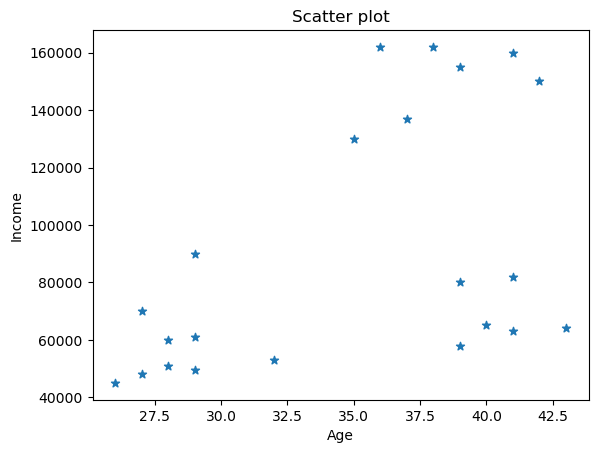

In [123]:
plt.scatter(df["Age"], df["Income"], marker='*')
plt.xlabel("Age")
plt.ylabel("Income")
plt.title('Scatter plot')
plt.show()

In [124]:
from sklearn.cluster import KMeans

In [125]:
model = KMeans(n_clusters=3)

In [126]:
model.fit(df[["Age","Income"]])

KMeans(n_clusters=3)

In [127]:
model.predict(df[["Age","Income"]])

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [128]:
df["Cluster"]= model.predict(df[["Age", "Income"]])

In [129]:
df.head()

,Age,Income,Cluster
0,27,70000,2
1,29,90000,2
2,29,61000,1
3,28,60000,1
4,42,150000,0


In [130]:
df0= df[df["Cluster"]==0]
df1= df[df["Cluster"]==1]
df2= df[df["Cluster"]==2]

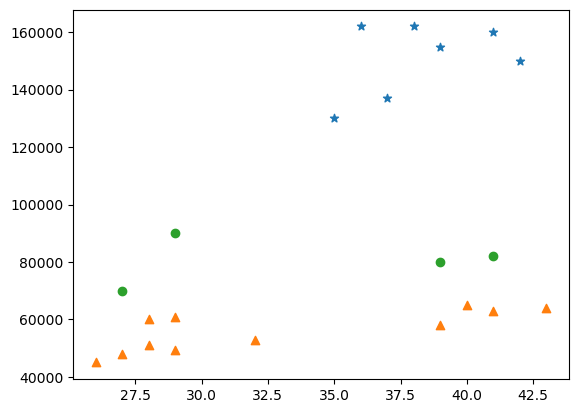

In [131]:
plt.scatter(df0["Age"], df0["Income"], label="0" , marker="*")
plt.scatter(df1["Age"], df1["Income"], label="1", marker="^")
plt.scatter(df2["Age"], df2["Income"], label="2")

### Our group doesn't form properly , cause our age and income range doesn't have any connection so we have to scale it 

In [132]:
from sklearn.preprocessing import MinMaxScaler

In [133]:
scaler= MinMaxScaler()

In [134]:
df[["Age", "Income"]]= scaler.fit_transform(df[["Age", "Income"]])

In [135]:
df.head()

,Age,Income,Cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0


## NOW again applying Kmean

In [136]:
model = KMeans(n_clusters=3)
model.fit(df[["Age","Income"]])
df["Cluster"]=model.predict(df[["Age","Income"]])

df0= df[df["Cluster"]==0]
df1= df[df["Cluster"]==1]
df2= df[df["Cluster"]==2]

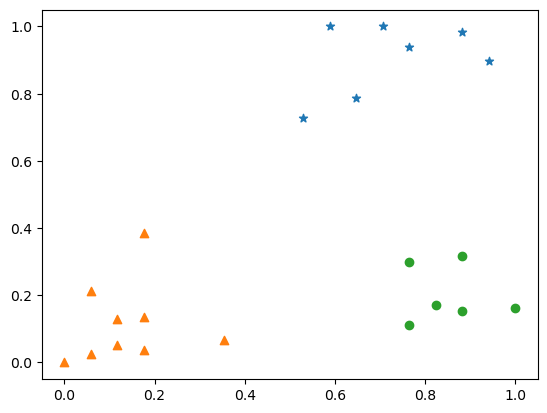

In [137]:
plt.scatter(df0["Age"], df0["Income"], label="0" , marker="*")
plt.scatter(df1["Age"], df1["Income"], label="1", marker="^")
plt.scatter(df2["Age"], df2["Income"], label="2")

In [138]:
model.cluster_centers_

array([[0.72268908, 0.9047619 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [139]:
model.cluster_centers_[:,0]

array([0.72268908, 0.1372549 , 0.85294118])

In [140]:
model.cluster_centers_[:,1]

array([0.9047619 , 0.11633428, 0.2022792 ])

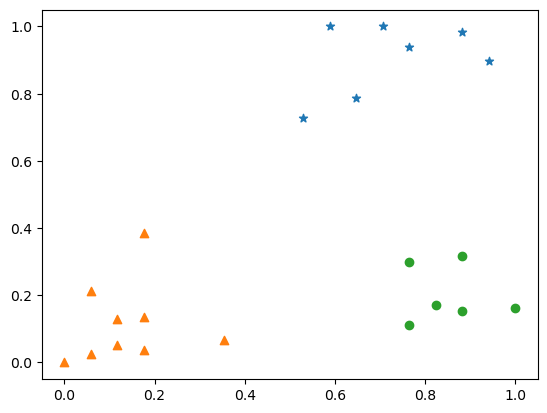

In [142]:
plt.scatter(df0["Age"], df0["Income"], label="0" , marker="*")
plt.scatter(df1["Age"], df1["Income"], label="1", marker="^")
plt.scatter(df2["Age"], df2["Income"], label="2")

In [143]:
model.inertia_

0.4825922035230094

## Elbow method:
    

In [144]:
sse=[]
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(df[["Age",'Income']])
    sse.append(model.inertia_)

In [145]:
sse

[5.493999956592007,
 2.1317304647961124,
 0.4825922035230094,
 0.36400718588289455,
 0.2770817526754593,
 0.22330578121250355,
 0.16887732778070813,
 0.13294640369286218,
 0.10218008267020481,
 0.085401357584024]

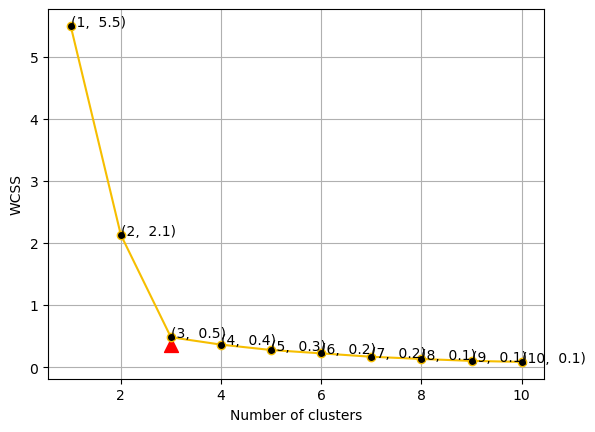

In [168]:
plt.plot( range(1,11), sse , marker='o' ,mfc="black", color='#F6BE00')
plt.scatter(3 , sse[3], marker='^', s=100 , c='r')
plt.grid()
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
for i , j in zip(range(1,11),sse):
     plt.text(i, j, f'({i},  {j:.1f})')